In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("data.csv")
df.head()

id                                            xpoints  \
0  331362  1203.1463623046875,1164.842529296875,2544.9577...   
1  331393  1803.693359375,1636.7987060546875,2728.6644346...   
2  331341  1438.8106689453125,1472.6400146484375,2729.090...   
3  331339  1036.25146484375,1197.67431640625,2669.8478001...   
4  331445  1669.6304931640625,3040.35546875,2541.02980809...   

                                             ypoints  annotationtypeid  \
0  504.78802490234375,2051.9833984375,2086.150835...              3392   
1  666.210693359375,2482.900146484375,2583.207082...              3392   
2  793.1079711914062,2588.235107421875,2564.55717...              3392   
3  824.8972778320312,2880.98486328125,2765.404941...              3392   
4  396.7168273925781,1121.7509765625,2065.7591378...              3392   

  annotation  assetcomponentid  assetcomponenttypeid  \
0         Ok            307759                  1052   
1         Ok            307790                  1052   
2         Ok            307738                  1052   
3         Ok            307736                  1052   
4         Ok            307842                  1052   

                         component_name     component_type_name  \
0  AI-Spacer Damper- Quad_1735282284415  AI-Spacer Damper- Quad   
1  AI-Spacer Damper- Quad_1735283203331  AI-Spacer Damper- Quad   
2  AI-Spacer Damper- Quad_1735281843515  AI-Spacer Damper- Quad   
3  AI-Spacer Damper- Quad_1735281787635  AI-Spacer Damper- Quad   
4  AI-Spacer Damper- Quad_1735284276217  AI-Spacer Damper- Quad   

                            filename  
0  PM_PB_TOWER_259_C1_Y_LSP_6_1_.jpg  
1  PM_PB_TOWER_294_C1_Y_LSP_4_1_.jpg  
2  PM_PB_TOWER_246_C1_Y_LSP_3_1_.jpg  
3  PM_PB_TOWER_243_C1_B_LSP_6_1_.jpg  
4  PM_PB_TOWER_484_C1_B_LSP_4_1_.jpg

In [5]:
df.isnull().sum()

id                      0
xpoints                 0
ypoints                 0
annotationtypeid        0
annotation              0
assetcomponentid        0
assetcomponenttypeid    0
component_name          0
component_type_name     0
filename                0
dtype: int64

# sampling

In [8]:
!pip install imbalanced-learn pandas scikit-learn



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
df2=pd.read_csv("balanced_annotations.csv")
df2.head()

id                                            xpoints  \
0  298865  2094.117431640625,2172.549072265625,1844.25976...   
1  296148  1901.431640625,1512.90625,1517.113376516836,19...   
2  293464  1938.997802734375,2997.8212890625,3011.3857826...   
3  266588  1137.2547607421875,1581.69921875,1562.99115141...   
4  166926  1629.41162109375,2164.70556640625,2137.2985820...   

                                             ypoints  annotationtypeid  \
0  35.29411315917969,2768.627197265625,2778.04729...              3331   
1  2486.348388671875,2532.31494140625,2567.875047...              3540   
2  2844.252197265625,2909.61181640625,2689.867507...              3755   
3  2967.046630859375,2958.332275390625,2004.19437...              3331   
4  1554.90185546875,1580.39208984375,2155.9377114...              3340   

  annotation  assetcomponentid  assetcomponenttypeid  \
0         ok            275293                  1037   
1         ok            272576                  1090   
2     tilted            269892                  1101   
3         ok            243016                  1037   
4         ok            143356                  1039   

                                 component_name  \
0           AI-Insulator Long Rod_1731577884668   
1  AI-Armour Rod for Sus. Fitting_1731213141096   
2         AI-Grading Ring-Twrside_1730398069867   
3           AI-Insulator Long Rod_1729951147042   
4                  AI-Arcing Horn_1728038805692   

              component_type_name                         filename  label  
0           AI-Insulator Long Rod  PM-BB-TOWER-0019-C2-T-I(15).JPG      0  
1  AI-Armour Rod for Sus. Fitting   PM-BB-TOWER-0016-C1-B-I(4).JPG      0  
2         AI-Grading Ring-Twrside   PM-BB-TOWER-0013-C1-M-I(1).JPG     12  
3           AI-Insulator Long Rod  PM-BB-TOWER-0010-C2-T-I(10).JPG      0  
4                  AI-Arcing Horn   PM-BB-TOWER-0004-C1-B-I(6).JPG      0

In [58]:
annotation_counts = df2['annotation'].value_counts()

# Print the counts
print("Class distribution in 'annotation' column:")
print(annotation_counts)

Class distribution in 'annotation' column:
annotation
ok                     7041
tilted                 4247
bush found              900
loose                   451
bend/deformed           286
wrongly placed          197
missing                 150
rusted                  145
damaged                 122
wrong direction          89
degraded                 73
loose, deformed          58
bent                     45
dislocated               43
misaligned               33
other                    32
strand cut               31
bolt missing             30
damaged ring             30
excess soil              27
missing - tower end      20
cap open                 16
one limb cut             16
Name: count, dtype: int64


In [60]:
# Extract only the three columns you need
selected_columns = ['xpoints', 'ypoints', 'filename']
df_selected = df2[selected_columns]

# Save to CSV file
df_selected.to_csv('selected_columns.csv', index=False)

# Verify the first few rows of the extracted data
print(df_selected.head())

                                             xpoints  \
0  2094.117431640625,2172.549072265625,1844.25976...   
1  1901.431640625,1512.90625,1517.113376516836,19...   
2  1938.997802734375,2997.8212890625,3011.3857826...   
3  1137.2547607421875,1581.69921875,1562.99115141...   
4  1629.41162109375,2164.70556640625,2137.2985820...   

                                             ypoints  \
0  35.29411315917969,2768.627197265625,2778.04729...   
1  2486.348388671875,2532.31494140625,2567.875047...   
2  2844.252197265625,2909.61181640625,2689.867507...   
3  2967.046630859375,2958.332275390625,2004.19437...   
4  1554.90185546875,1580.39208984375,2155.9377114...   

                          filename  
0  PM-BB-TOWER-0019-C2-T-I(15).JPG  
1   PM-BB-TOWER-0016-C1-B-I(4).JPG  
2   PM-BB-TOWER-0013-C1-M-I(1).JPG  
3  PM-BB-TOWER-0010-C2-T-I(10).JPG  
4   PM-BB-TOWER-0004-C1-B-I(6).JPG  


In [62]:
df3=pd.read_csv("selected_columns.csv")
df3.head()

xpoints  \
0  2094.117431640625,2172.549072265625,1844.25976...   
1  1901.431640625,1512.90625,1517.113376516836,19...   
2  1938.997802734375,2997.8212890625,3011.3857826...   
3  1137.2547607421875,1581.69921875,1562.99115141...   
4  1629.41162109375,2164.70556640625,2137.2985820...   

                                             ypoints  \
0  35.29411315917969,2768.627197265625,2778.04729...   
1  2486.348388671875,2532.31494140625,2567.875047...   
2  2844.252197265625,2909.61181640625,2689.867507...   
3  2967.046630859375,2958.332275390625,2004.19437...   
4  1554.90185546875,1580.39208984375,2155.9377114...   

                          filename  
0  PM-BB-TOWER-0019-C2-T-I(15).JPG  
1   PM-BB-TOWER-0016-C1-B-I(4).JPG  
2   PM-BB-TOWER-0013-C1-M-I(1).JPG  
3  PM-BB-TOWER-0010-C2-T-I(10).JPG  
4   PM-BB-TOWER-0004-C1-B-I(6).JPG

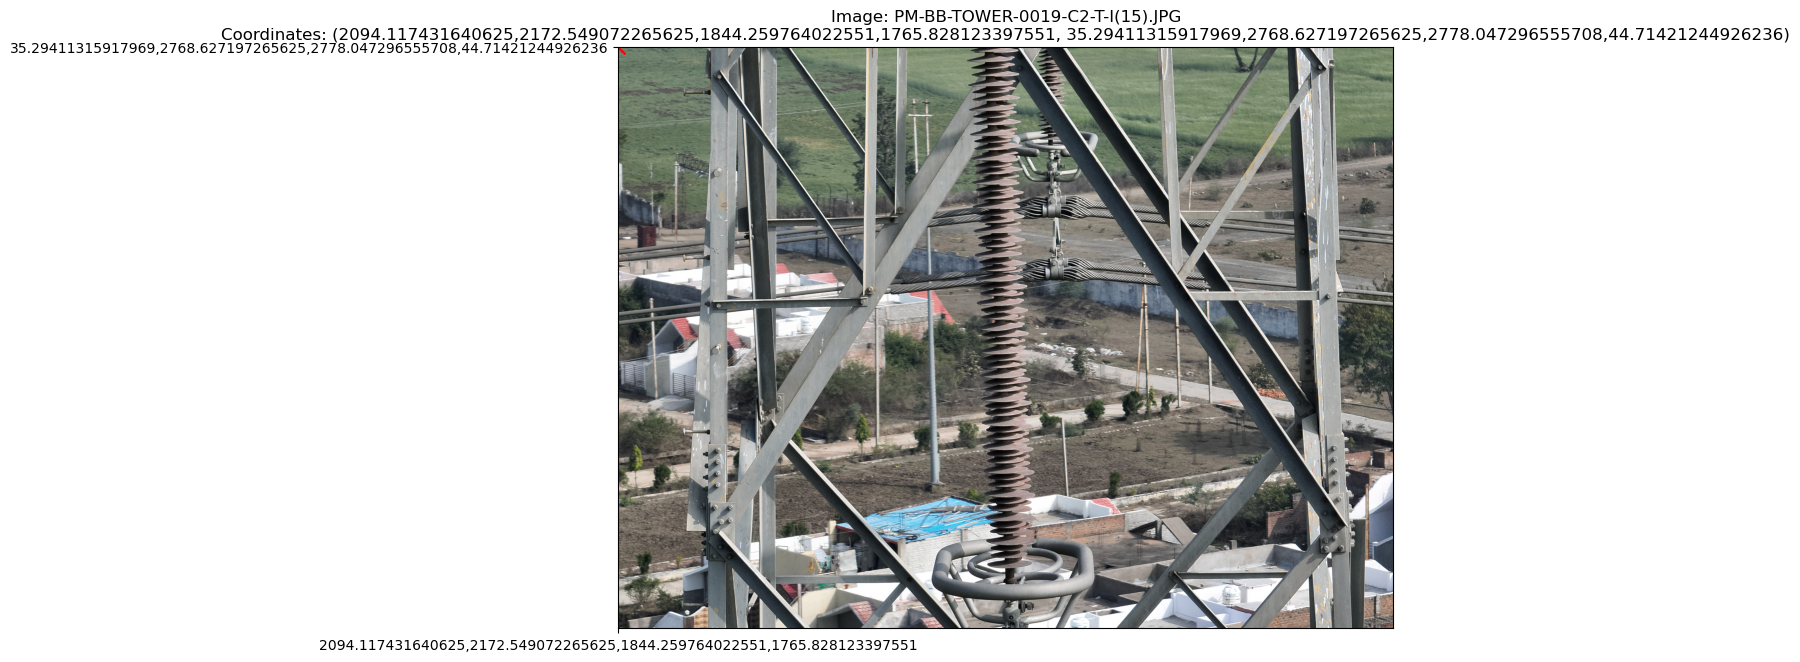

C:\Users\ObelWork-1\AppData\Local\Temp\ipykernel_25472\3474276340.py:110: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


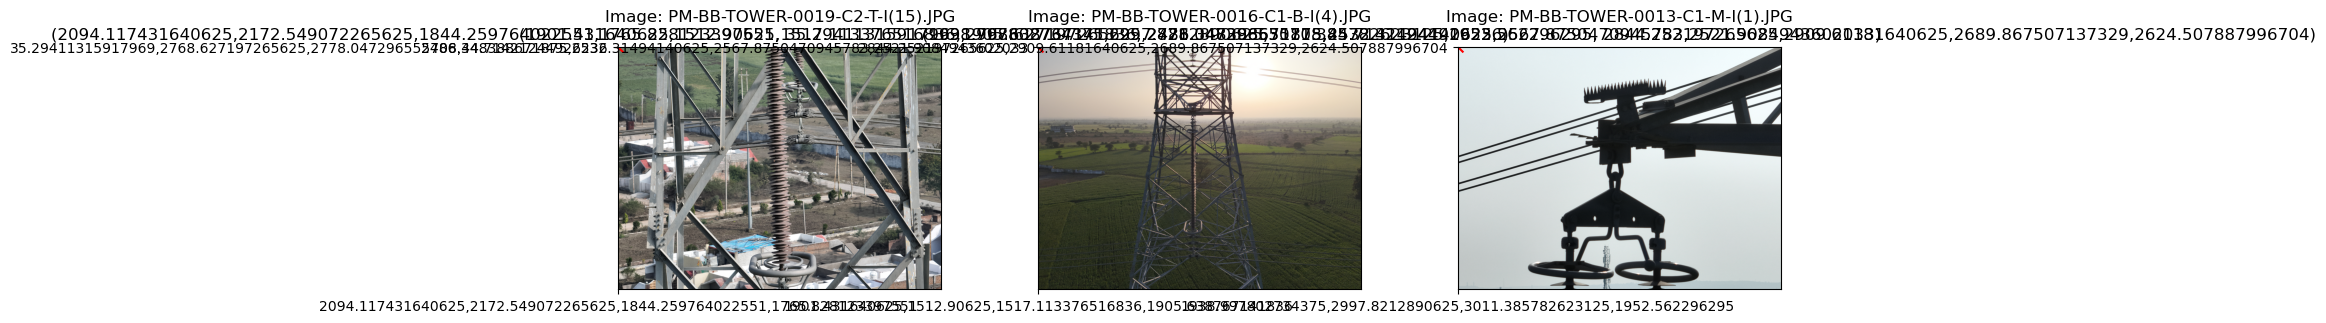

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
def display_image(row_index, data_folder='data'):
    """
    Display the image for a specific row in the dataframe.
    
    Parameters:
    row_index (int): Index of the row in the dataframe
    data_folder (str): Path to the folder containing images
    """
    if row_index >= len(df3):
        print(f"Error: Index {row_index} is out of bounds. The dataframe has {len(df3)} rows.")
        return
    
    # Get the filename from the dataframe
    filename = df3.loc[row_index, 'filename']
    
    # Construct the full path to the image
    image_path = os.path.join(data_folder, filename)
    
    # Check if the file exists
    if not os.path.exists(image_path):
        print(f"Error: Image file not found at {image_path}")
        return
    
    # Load and display the image
    try:
        img = Image.open(image_path)
        
        # Create a figure
        plt.figure(figsize=(10, 8))
        
        # Display the image
        plt.imshow(img)
        
        # Get x and y points if you want to display them on the image
        x_point = df3.loc[row_index, 'xpoints']
        y_point = df3.loc[row_index, 'ypoints']
        
        # Plot the point on the image (if coordinates are available)
        if pd.notna(x_point) and pd.notna(y_point):
            plt.scatter(x_point, y_point, c='red', s=100, marker='x')
        
        # Set title with the filename
        plt.title(f"Image: {filename}\nCoordinates: ({x_point}, {y_point})")
        
        # Show the image
        plt.axis('on')
        plt.show()
        
    except Exception as e:
        print(f"Error displaying image: {e}")

# Example usage - display image from the first row
display_image(0)

# To display multiple images, you can create a function that displays a range of images
def display_multiple_images(start_index, num_images=5, data_folder='data'):
    """
    Display multiple images from the dataframe.
    
    Parameters:
    start_index (int): Starting index in the dataframe
    num_images (int): Number of images to display
    data_folder (str): Path to the folder containing images
    """
    # Calculate end index (with bounds checking)
    end_index = min(start_index + num_images, len(df3))
    
    # Create a figure with subplots
    fig, axes = plt.subplots(1, end_index - start_index, figsize=(15, 8))
    
    # Adjust layout for better spacing
    plt.subplots_adjust(wspace=0.3)
    
    # Handle case where only one image is shown
    if end_index - start_index == 1:
        axes = [axes]
    
    # Display each image
    for i, idx in enumerate(range(start_index, end_index)):
        filename = df3.loc[idx, 'filename']
        image_path = os.path.join(data_folder, filename)
        
        if os.path.exists(image_path):
            try:
                img = Image.open(image_path)
                axes[i].imshow(img)
                
                # Get and plot coordinates
                x_point = df3.loc[idx, 'xpoints']
                y_point = df3.loc[idx, 'ypoints']
                
                if pd.notna(x_point) and pd.notna(y_point):
                    axes[i].scatter(x_point, y_point, c='red', s=50, marker='x')
                
                # Set title
                axes[i].set_title(f"Image: {os.path.basename(filename)}\n({x_point}, {y_point})")
                axes[i].axis('on')
                
            except Exception as e:
                axes[i].text(0.5, 0.5, f"Error: {e}", ha='center', va='center')
                axes[i].axis('off')
        else:
            axes[i].text(0.5, 0.5, "File not found", ha='center', va='center')
            axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage - display 3 images starting from index 0
display_multiple_images(0, 3)

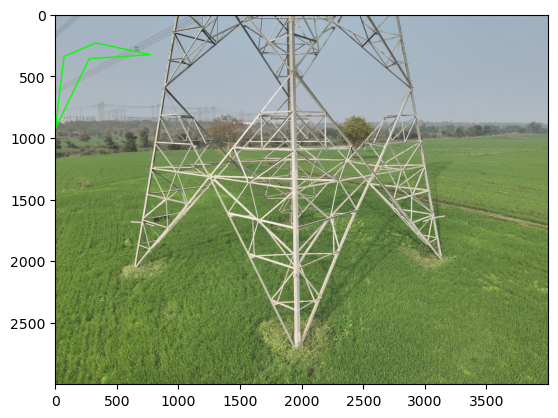

In [76]:
import cv2
import PIL
import numpy as np
import matplotlib.pyplot as plt

def draw_bounding_box(image_path, x, y):
    image = cv2.imread(image_path)
    pts = np.array([[x[i], y[i]] for i in range(len(x))], np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.polylines(image, [pts], isClosed=True, color=(0, 255, 0), thickness=10)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

image_path = r"C:\Users\ObelWork-1\DeepMatrix\DATA\DJI_20240111150546_0023_V.JPG(1).JPG"

draw_bounding_box(image_path, 
                 [73, 332, 773, 277, 2],
                 [343, 234, 329, 362, 930])

Processing image: PM-BB-TOWER-0019-C2-T-I(15).JPG


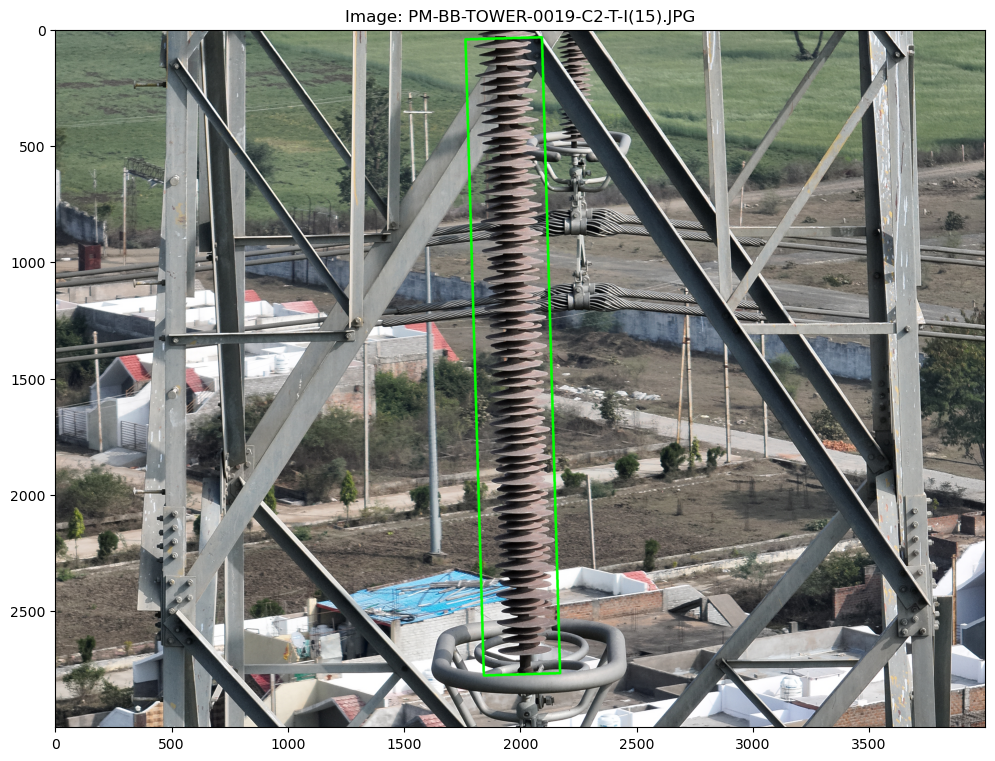

In [80]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load the CSV file
df3 = pd.read_csv('selected_columns.csv')

def draw_bounding_box(image_path, x_points, y_points):
    """
    Draw a bounding box on an image using the provided x and y coordinates.
    
    Parameters:
    image_path (str): Path to the image file
    x_points (list): List of x coordinates
    y_points (list): List of y coordinates
    """
    # Check if the file exists
    if not os.path.exists(image_path):
        print(f"Error: Image file not found at {image_path}")
        return
    
    try:
        # Read the image
        image = cv2.imread(image_path)
        
        # Convert string coordinates to list of integers if needed
        if isinstance(x_points, str):
            x_points = [int(float(x)) for x in x_points.strip('[]').split(',')]
        if isinstance(y_points, str):
            y_points = [int(float(y)) for y in y_points.strip('[]').split(',')]
        
        # Create points array for the polygon
        pts = np.array([[x_points[i], y_points[i]] for i in range(len(x_points))], np.int32)
        pts = pts.reshape((-1, 1, 2))
        
        # Draw polygon on the image
        cv2.polylines(image, [pts], isClosed=True, color=(0, 255, 0), thickness=10)
        
        # Display the image
        plt.figure(figsize=(12, 10))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f"Image: {os.path.basename(image_path)}")
        plt.axis('on')
        plt.show()
        
    except Exception as e:
        print(f"Error processing image: {e}")

# Function to process each row in the dataframe
def process_all_images_from_csv(data_folder=r"C:\Users\ObelWork-1\DeepMatrix\DATA"):
    """
    Process all images listed in the CSV file.
    
    Parameters:
    data_folder (str): Path to the folder containing images
    """
    for index, row in df3.iterrows():
        try:
            # Get filename, x_points, and y_points from the row
            filename = row['filename']
            x_points = row['xpoints']
            y_points = row['ypoints']
            
            # Construct the full image path
            image_path = os.path.join(data_folder, filename)
            
            print(f"Processing image {index+1}/{len(df3)}: {filename}")
            
            # Draw bounding box on the image
            draw_bounding_box(image_path, x_points, y_points)
            
            # Optional: Add a pause or wait for user input between images
            if index < len(df3) - 1:  # If not the last image
                user_input = input("Press Enter to continue to the next image, or 'q' to quit: ")
                if user_input.lower() == 'q':
                    break
                    
        except Exception as e:
            print(f"Error processing row {index}: {e}")
            continue

# Function to process a single image from the CSV by row index
def process_single_image(row_index, data_folder=r"C:\Users\ObelWork-1\DeepMatrix\DATA"):
    """
    Process a single image from the CSV file by row index.
    
    Parameters:
    row_index (int): Index of the row in the dataframe
    data_folder (str): Path to the folder containing images
    """
    if row_index >= len(df3):
        print(f"Error: Index {row_index} is out of bounds. The dataframe has {len(df3)} rows.")
        return
    
    try:
        # Get filename, x_points, and y_points from the row
        filename = df3.loc[row_index, 'filename']
        x_points = df3.loc[row_index, 'xpoints']
        y_points = df3.loc[row_index, 'ypoints']
        
        # Construct the full image path
        image_path = os.path.join(data_folder, filename)
        
        print(f"Processing image: {filename}")
        
        # Draw bounding box on the image
        draw_bounding_box(image_path, x_points, y_points)
        
    except Exception as e:
        print(f"Error processing row {row_index}: {e}")

# Example usage - process a single image (first row in the CSV)
process_single_image(0)

# To process all images in the CSV, uncomment the following line:
# process_all_images_from_csv()

In [82]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load the CSV file
df3 = pd.read_csv('selected_columns.csv')

# Create output directory if it doesn't exist
output_dir = 'bounded_data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created output directory: {output_dir}")

def draw_and_save_bounding_box(image_path, x_points, y_points, output_path):
    """
    Draw a bounding box on an image and save the result to a new file.
    
    Parameters:
    image_path (str): Path to the input image file
    x_points (list): List of x coordinates
    y_points (list): List of y coordinates
    output_path (str): Path to save the output image
    
    Returns:
    bool: True if successful, False otherwise
    """
    # Check if the file exists
    if not os.path.exists(image_path):
        print(f"Error: Image file not found at {image_path}")
        return False
    
    try:
        # Read the image
        image = cv2.imread(image_path)
        
        # Convert string coordinates to list of integers if needed
        if isinstance(x_points, str):
            x_points = [int(float(x)) for x in x_points.strip('[]').split(',')]
        if isinstance(y_points, str):
            y_points = [int(float(y)) for y in y_points.strip('[]').split(',')]
        
        # Create points array for the polygon
        pts = np.array([[x_points[i], y_points[i]] for i in range(len(x_points))], np.int32)
        pts = pts.reshape((-1, 1, 2))
        
        # Draw polygon on the image
        cv2.polylines(image, [pts], isClosed=True, color=(0, 255, 0), thickness=10)
        
        # Save the image with bounding box
        cv2.imwrite(output_path, image)
        
        return True
        
    except Exception as e:
        print(f"Error processing image: {e}")
        return False

def process_all_images_from_csv(data_folder=r"C:\Users\ObelWork-1\DeepMatrix\DATA", output_folder='bounded_data'):
    """
    Process all images listed in the CSV file, draw bounding boxes, and save to output folder.
    
    Parameters:
    data_folder (str): Path to the folder containing original images
    output_folder (str): Path to the folder where bounded images will be saved
    
    Returns:
    tuple: (success_count, total_count)
    """
    success_count = 0
    total_count = len(df3)
    
    print(f"Starting to process {total_count} images...")
    
    for index, row in df3.iterrows():
        try:
            # Get filename, x_points, and y_points from the row
            filename = row['filename']
            x_points = row['xpoints']
            y_points = row['ypoints']
            
            # Construct the full input and output image paths
            input_image_path = os.path.join(data_folder, filename)
            
            # Create output filename (preserving original extension)
            base_name, ext = os.path.splitext(filename)
            output_filename = f"{base_name}_bounded{ext}"
            output_image_path = os.path.join(output_folder, output_filename)
            
            print(f"Processing image {index+1}/{total_count}: {filename}")
            
            # Draw bounding box and save the image
            if draw_and_save_bounding_box(input_image_path, x_points, y_points, output_image_path):
                success_count += 1
                print(f"Successfully saved: {output_filename}")
            else:
                print(f"Failed to process: {filename}")
                
        except Exception as e:
            print(f"Error processing row {index}: {e}")
            continue
    
    print(f"\nProcessing complete. Successfully processed {success_count} out of {total_count} images.")
    return success_count, total_count

# Run the processing function
if __name__ == "__main__":
    # Define the input data folder
    data_folder = r"C:\Users\ObelWork-1\DeepMatrix\DATA"
    
    # Process all images and save bounded versions
    success, total = process_all_images_from_csv(data_folder=data_folder, output_folder=output_dir)
    
    # Print summary
    print(f"\nSummary:")
    print(f"- Total images in CSV: {total}")
    print(f"- Successfully processed: {success}")
    print(f"- Failed: {total - success}")
    print(f"- Bounded images saved to: {os.path.abspath(output_dir)}")

Created output directory: bounded_data
Starting to process 14082 images...
Processing image 1/14082: PM-BB-TOWER-0019-C2-T-I(15).JPG
Successfully saved: PM-BB-TOWER-0019-C2-T-I(15)_bounded.JPG
Processing image 2/14082: PM-BB-TOWER-0016-C1-B-I(4).JPG
Successfully saved: PM-BB-TOWER-0016-C1-B-I(4)_bounded.JPG
Processing image 3/14082: PM-BB-TOWER-0013-C1-M-I(1).JPG
Successfully saved: PM-BB-TOWER-0013-C1-M-I(1)_bounded.JPG
Processing image 4/14082: PM-BB-TOWER-0010-C2-T-I(10).JPG
Successfully saved: PM-BB-TOWER-0010-C2-T-I(10)_bounded.JPG
Processing image 5/14082: PM-BB-TOWER-0004-C1-B-I(6).JPG
Successfully saved: PM-BB-TOWER-0004-C1-B-I(6)_bounded.JPG
Processing image 6/14082: PM-BB-TOWER-0008-C1-B-I-SS(4).JPG
Successfully saved: PM-BB-TOWER-0008-C1-B-I-SS(4)_bounded.JPG
Processing image 7/14082: PM-BB-TOWER-0016-C2-T-I(12).JPG
Successfully saved: PM-BB-TOWER-0016-C2-T-I(12)_bounded.JPG
Processing image 8/14082: PM-BB-TOWER-0015-C1-0-EP(1).JPG
Successfully saved: PM-BB-TOWER-0015-C1-0-E

In [84]:
df4=pd.read_csv("cleaned_annotations - Copy.csv")
df4.head()

filename  annotation
0  PM_PB_TOWER_259_C1_Y_LSP_6_1_.jpg           0
1  PM_PB_TOWER_294_C1_Y_LSP_4_1_.jpg           0
2  PM_PB_TOWER_246_C1_Y_LSP_3_1_.jpg           0
3  PM_PB_TOWER_243_C1_B_LSP_6_1_.jpg           0
4  PM_PB_TOWER_484_C1_B_LSP_4_1_.jpg           0

In [130]:
import pandas as pd

# Input and output file paths
input_file = 'balanced_annotations_new.csv'  # Replace with your original CSV file name
output_file = 'output_bounded3.csv'

# Read the CSV file
df5 = pd.read_csv(input_file)

# Add '_bounded' before the '.jpg' or '.JPG' extension in the 'filename' column
df5['filename'] = df5['filename'].str.replace(r'(\.jpg|\.JPG)$', '_bounded\\1', regex=True)

# Save the updated DataFrame to a new CSV file
df5.to_csv(output_file, index=False)

print(f"Updated CSV file saved as '{output_file}'")

Updated CSV file saved as 'output_bounded3.csv'


# Model Training

# Import libraries

In [132]:
annotation_counts = df5['annotation'].value_counts()

# Print the counts
print("Class distribution in 'annotation' column:")
print(annotation_counts)

Class distribution in 'annotation' column:
annotation
0     7041
12    4247
3      900
4      509
9      286
6      197
5      150
8      145
2      122
13      89
19      73
7       45
17      43
16      33
21      32
20      31
14      30
10      30
18      27
11      20
15      16
1       16
Name: count, dtype: int64


In [156]:
df5.head()

filename  annotation
0  PM-BB-TOWER-0019-C2-T-I(15)_bounded.JPG           0
1   PM-BB-TOWER-0016-C1-B-I(4)_bounded.JPG           0
2   PM-BB-TOWER-0013-C1-M-I(1)_bounded.JPG          12
3  PM-BB-TOWER-0010-C2-T-I(10)_bounded.JPG           0
4   PM-BB-TOWER-0004-C1-B-I(6)_bounded.JPG           0

# Using vgg16

In [159]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load the data
df5 = pd.read_csv('output_bounded3.csv')  # Replace with your actual CSV file path

# Add the base path to the filenames
df5['filepath'] = 'C:/Users/ObelWork-1/DeepMatrix/bounded_data/' + df5['filename']

# Split the data into training and validation sets
train_df, val_df = train_test_split(df5, test_size=0.2, random_state=42)

# Create an ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for training and validation data
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='annotation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepath',
    y_col='annotation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw'
)

# Load the VGG16 model with pre-trained weights, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='linear')(x)  # Assuming regression task

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.n // val_generator.batch_size,
    epochs=10
)

# Save the model
model.save('vgg16_finetuned_model.h5')

Found 11265 validated image filenames.
Found 2817 validated image filenames.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


C:\Users\ObelWork-1\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1672s 5s/step - loss: 30.1705 - val_loss: 24.3474
Epoch 2/10
  1/352 ━━━━━━━━━━━━━━━━━━━━ 1:47 307ms/step - loss: 16.7774

C:\Users\ObelWork-1\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


352/352 ━━━━━━━━━━━━━━━━━━━━ 308s 877ms/step - loss: 16.7774 - val_loss: 24.4922
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1608s 5s/step - loss: 25.7643 - val_loss: 23.2067
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 307s 874ms/step - loss: 22.7676 - val_loss: 23.1565
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1596s 5s/step - loss: 24.1702 - val_loss: 22.9610
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 308s 876ms/step - loss: 21.9535 - val_loss: 22.7790
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1596s 5s/step - loss: 23.7553 - val_loss: 25.4669
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 309s 880ms/step - loss: 34.3442 - val_loss: 24.3613
Epoch 9/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1606s 5s/step - loss: 23.1133 - val_loss: 22.3079
Epoch 10/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 308s 877ms/step - loss: 17.6122 - val_loss: 22.3151


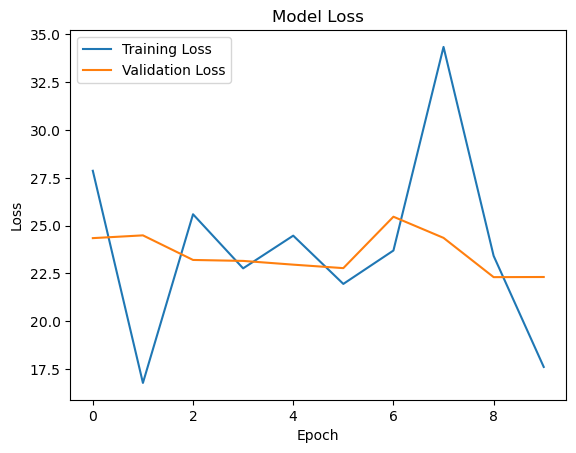

In [161]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

89/89 ━━━━━━━━━━━━━━━━━━━━ 313s 4s/step


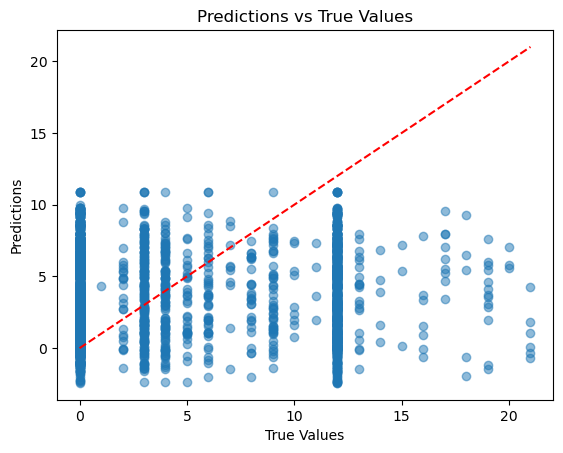

In [163]:
# Get predictions from the validation set
val_predictions = model.predict(val_generator)

# Extract true values from the validation generator
true_values = val_generator.labels

# Scatter plot of predictions vs true values
plt.scatter(true_values, val_predictions, alpha=0.5)
plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], color='red', linestyle='--')  # Diagonal line
plt.title('Predictions vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

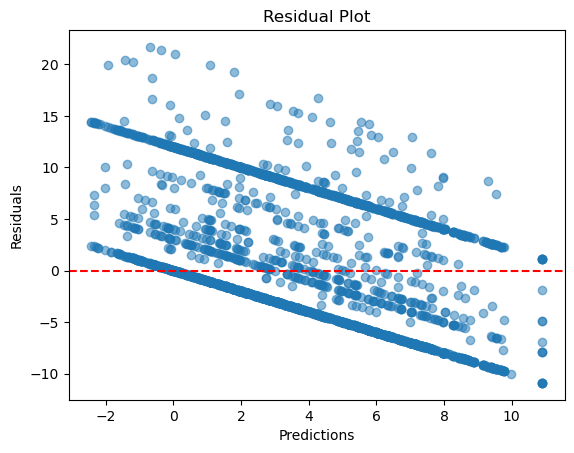

In [165]:
# Calculate residuals
residuals = true_values - val_predictions.flatten()

# Residual plot
plt.scatter(val_predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at zero
plt.title('Residual Plot')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

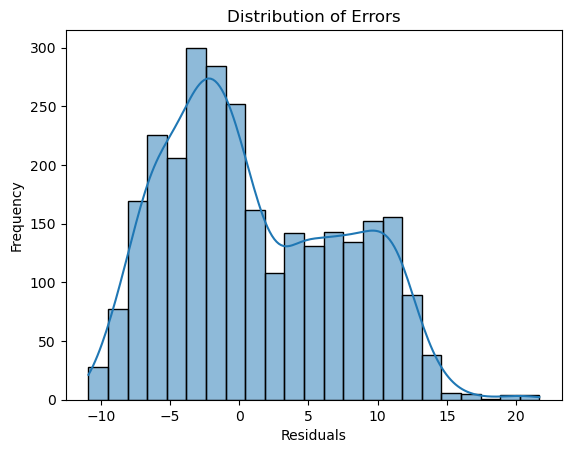

In [167]:
import seaborn as sns

# Plot the distribution of residuals
sns.histplot(residuals, kde=True)
plt.title('Distribution of Errors')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

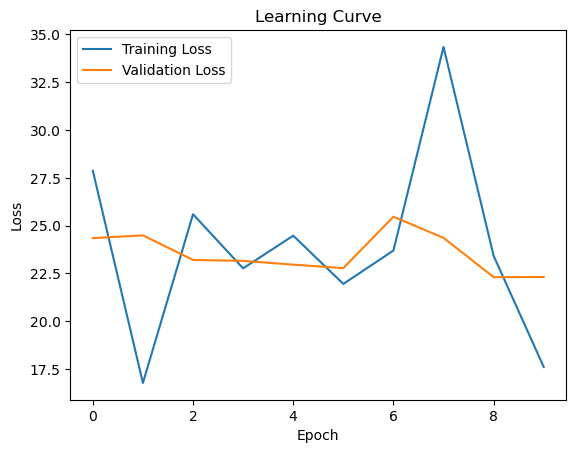

In [169]:
# Plot learning curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

89/89 ━━━━━━━━━━━━━━━━━━━━ 313s 4s/step


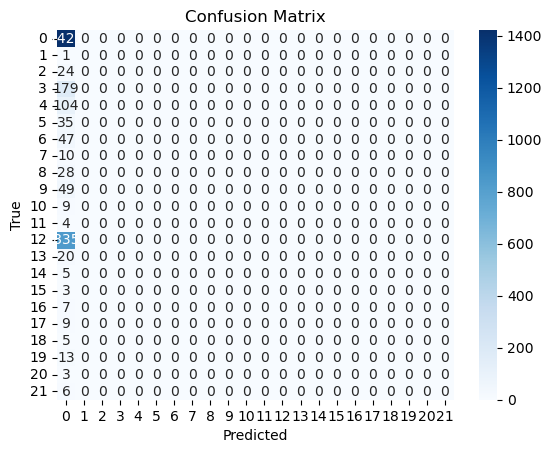

In [171]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions for classification
val_predictions = model.predict(val_generator)
val_predictions = np.argmax(val_predictions, axis=1)  # For multi-class classification

# Confusion matrix
cm = confusion_matrix(val_generator.labels, val_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [186]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and MSE
mae = mean_absolute_error(true_values, val_predictions)
mse = mean_squared_error(true_values, val_predictions)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')

Mean Absolute Error (MAE): 4.7962
Mean Squared Error (MSE): 54.4554


In [188]:
from sklearn.metrics import r2_score

# Calculate R² score
r2 = r2_score(true_values, val_predictions)
print(f'R² Score: {r2:.4f}')

R² Score: -0.7314


In [190]:
!pip install gradio tensorflow

  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
   ---------------------------------------- 0.0/62.3 MB ? eta -:--:--
    --------------------------------------- 0.8/62.3 MB 6.7 MB/s eta 0:00:10
   -------- ------------------------------- 13.6/62.3 MB 45.0 MB/s eta 0:00:02
   ------------------ --------------------- 29.4/62.3 MB 60.1 MB/s eta 0:00:01
   ------------------- -------------------- 29.9/62.3 MB 44.1 MB/s eta 0:00:01
   ------------------------ --------------- 37.5/62.3 MB 41.8 MB/s eta 0:00:01
   -------------------------- ------------- 41.9/62.3 MB 38.1 MB/s eta 0:00:01
   ------------------------------- -------- 49.3/62.3 MB 36.9 MB/s eta 0:00:01
   ---------------------------------------- 62.3/62.3 MB 40.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.4 MB ? eta -:--:--
   ---------------------------------------- 11.4/11.4 MB 88.7 MB/s eta 0:00:00
Using cached

In [192]:
import gradio as gr
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load the trained model
model = tf.keras.models.load_model('vgg16_finetuned_model.h5')

# Function to preprocess the image and make a prediction
def predict_annotation(img):
    # Resize the image to match VGG16 input size (224x224)
    img = img.resize((224, 224))
    
    # Convert the image to a numpy array and preprocess it
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    
    # Make a prediction
    prediction = model.predict(img_array)
    return float(prediction[0][0])  # Return the predicted annotation

# Define the Gradio interface
with gr.Blocks() as demo:
    gr.Markdown("# VGG16 Image Annotation Predictor")
    gr.Markdown("Upload an image, and the model will predict its annotation.")
    
    with gr.Row():
        with gr.Column():
            # Image input component
            image_input = gr.Image(label="Upload Image", type="pil")
            # Button to trigger prediction
            predict_button = gr.Button("Predict Annotation")
        with gr.Column():
            # Output component for the prediction
            annotation_output = gr.Number(label="Predicted Annotation")
            # Display the uploaded image
            image_output = gr.Image(label="Uploaded Image", interactive=False)
    
    # Link the button to the prediction function
    predict_button.click(
        fn=predict_annotation,
        inputs=image_input,
        outputs=annotation_output
    )
    
    # Display the uploaded image in the output section
    image_input.change(
        fn=lambda x: x,
        inputs=image_input,
        outputs=image_output
    )

# Launch the Gradio app
demo.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
